## Self Organizing Maps (SOM)


## Kohonen's Self Organizing Map(SOM)
- Diwas Adhikari
SOM is a type of Artificial Neural Network (ANN) used for producing a low dimensional representation of a high dimensional dataset. It is also called Kohonen map or Kohonen network. It consists of nodes or neurons organized in a grid-like structure having an associated weight and having the dimensionality same as the dimentionality of the input data. SOM learns to map high dimensional data into a grid or lattice while reserving the topological relationships between data points. 

<figure>
<img src="SOM.png" width="500"/>
</figure>

Why is SOM useful? 

SOM is an unsupervised competitive learning algorithm generally used for clustering and dimensionality: reduction, which has the following benefits.
- **Visualization**: Our brain cannot interpret higher dimensions very well. So, reducing the dimensions helps us to better visualize and interpret the data.
- **Noise Reduction**: While reducing the dimensions, only the most meaningful information is preserved. Which means, often, the noise goes away while reducing the dimensions.
- **Memory and Computational efficiency**: Lowering the dimensions of data reduces the amount of memory and resources required to process the data.

### Algorithm
1. **Initialization**: First we select the size of the map and initialize each node with random weights. 
2. **Selection of input vector**: Input vector is a reference node in the map using which we will update the nodes. This input vector is randomly picked. Let's call this input vector $D(t)$
3. **Finding the BMU**: *BMU(Best Matching Unit)* is the node which has the smallest distance (usually Eucledian distance) from the input weight vector. To find this node, we traverse through each node in the map and select the none with the minimum Eucledian Distance.
4. **Updating the Weights**: The BMU and it's neighbors within the *neighborhood distance* are updated in the following way.
 $W_v (s+1) = W_v (s) + \theta(u,v,s).\alpha(s).(D(t) - W_v(s))$
 Here, 
 - $W_v$ : Current weight vector of the node $v$
 - $s$ : Current iteration
 - $\theta(u,v,s)$: Neighborhood function which provides the restraint to distance from the BMU. In our project we have chosen the most commonly used *Gaussian Function* given by: $e^{(-distance^2 /2\sigma^2)}$, $\sigma$ is the spread of Gaussian function. Higher sigma means higher spread.
 - $\alpha(s)$ :Current learning rate
 - $D(t) - W_v(s)$: Distance between input vector and current vector
 
     If a neighbourhood function is not used, we define a neighbourhood range with BMU as its center and decay the neighbourhood range and learning rate with increasing iterations
 5. **Repitition**: We repeat steps 2-4 as long as $s < $ number of epochs

In [1]:
import warnings ;
warnings.filterwarnings('ignore') ;

In [2]:
import numpy as np ;
import pandas as pd ;
import seaborn as sb ;
from PIL import Image ;
import matplotlib.pyplot as plt ;
from scipy.spatial import distance ;
from sklearn.datasets import load_iris ;
from sklearn.preprocessing import MinMaxScaler ;
from IPython.display import clear_output ;

### 1. Dimensionality Reduction in Iris Dataset Using Kohonen's SOM with Gaussian's neighbourhood function

### SOM Class Definition 

In [3]:
class SelfOrganizingMap:
    # Initialization
    def __init__(self, input_size, map_size, learning_rate=0.2, sigma=1.0, num_epochs=100):
        self.input_size = input_size ;
        self.map_size = map_size ;
        self.learning_rate = learning_rate ;
        self.sigma = sigma ;
        self.num_epochs = num_epochs ;
        np.random.seed(100) ;
        self.weights = np.random.rand(map_size[0], map_size[1], input_size) ;
    
    # Calculating the node with minimum distance and returning the index
    def find_bmu(self, input_data):
        distances = np.linalg.norm(self.weights - input_data, axis=2) ;
        bmu = np.unravel_index(np.argmin(distances), distances.shape) ;
        return bmu ;

    # Updating the weights of neighboring nodes of BMU with update rule
    def update_weights(self, bmu, input_data, iteration):
        for i in range(self.map_size[0]):
            for j in range(self.map_size[1]):
                distance = np.linalg.norm(np.array([i, j]) - bmu) ;
                # Using Gaussian function as neighborhood function to calculate the influence
                influence = np.exp(-distance**2 / (2 * (self.sigma**2))) ;
                self.weights[i, j] += self.learning_rate * influence * (input_data - self.weights[i, j]) ;
    
    # Repeat the process of finding BMU and updating weights to train
    def train(self, data):
        for epoch in range(self.num_epochs):
            print(f"Epoch {epoch+1}/{self.num_epochs}") ;
            for input_data in data:
                bmu = self.find_bmu(input_data) ;
                self.update_weights(bmu, input_data, epoch) ;
        return self.weights

In [4]:
iris = load_iris() ;
data = iris.data ;
data.shape 

(150, 4)

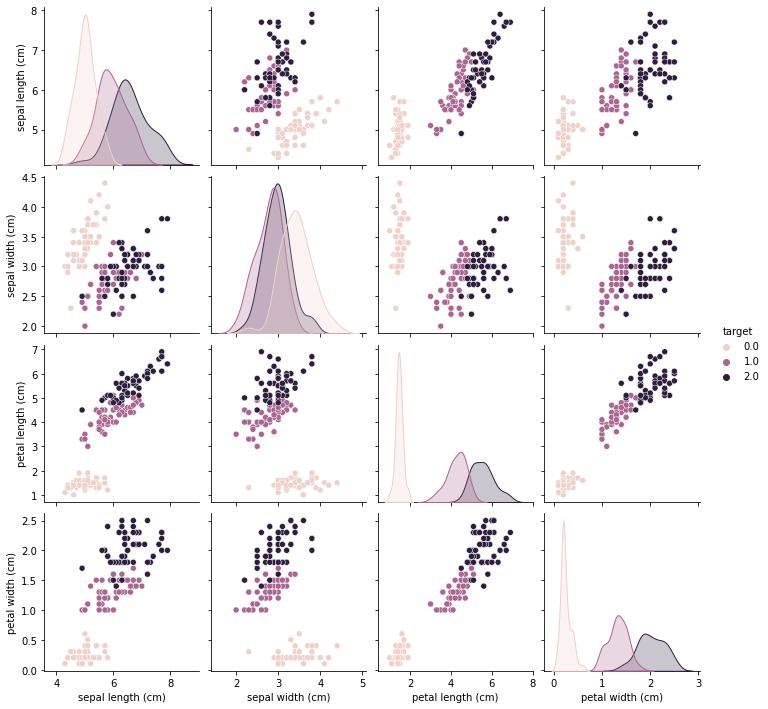

In [5]:
iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], columns=iris['feature_names'] + ['target'])
sb.pairplot(iris_df, hue='target') ;
plt.show() ;

In [6]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
#Normalization: x_scaled = (x - x_min)/(x_max - x_min)
scaler = MinMaxScaler() ;
data_normalized = scaler.fit_transform(data) ;
data_normalized[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

### Training Phase

In [8]:
input_size = data_normalized.shape[1] ;
map_size = (8,8) ;
som = SelfOrganizingMap(input_size, map_size) ;
lattice = som.train(data_normalized) ;

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

### Mapping labels to the data points with the best matching i.e. closest SOM Neuron

In [9]:
mapped_data = [] ;
labels = np.empty((8,8), dtype=object) ;
for i, input_data in enumerate(data_normalized):
    bmu = som.find_bmu(input_data) ;
    mapped_data.append(list(bmu)) ;
    labels[bmu[0]][bmu[1]] = iris.target[i] ;

labels

array([[1, 1, None, 0, 0, 0, 0, 0],
       [1, 1, 1, None, 0, 0, 0, 0],
       [2, 1, 1, None, None, 0, None, None],
       [None, None, None, 1, None, None, None, None],
       [2, 2, 2, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 1, 1, 2, None],
       [2, 2, 2, 2, 2, None, 2, 2],
       [2, 2, 2, 2, 2, 2, 2, 2]], dtype=object)

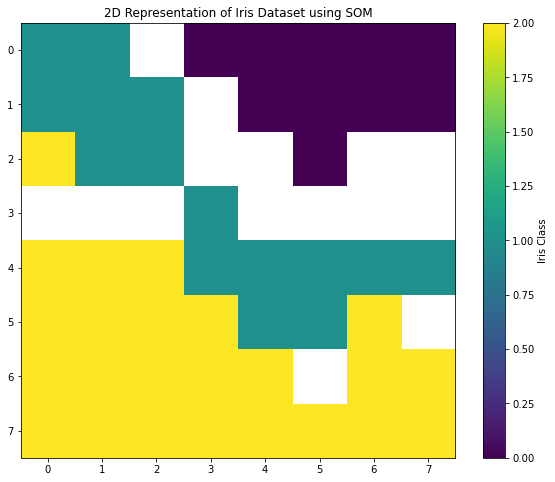

In [10]:
plt.figure(figsize=(10, 8)) ;
plt.imshow(labels.astype('float64')) ;
plt.title("2D Representation of Iris Dataset using SOM") ;
plt.xticks(range(map_size[1])) ;
plt.yticks(range(map_size[0])) ;
plt.colorbar(label='Iris Class') ;
plt.show() ;

### Accuracy & Clustering Validation 

In [11]:
predictedLabels = [] ;
for input_data in data_normalized:
    bmu = som.find_bmu(input_data) ;
    predictedLabels.append(labels[bmu[0]][bmu[1]]) ;
      
print(predictedLabels) ;

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [12]:
from sklearn.metrics import accuracy_score ;
accuracy = accuracy_score(iris.target, predictedLabels) ;
print('Accuracy: ', np.round(accuracy*100,2), "%") ;

Accuracy:  95.33 %


#### Adjusted Rand Index (ARI) measures similarity between actual and predicted clustering such that ARI = 0.868 is very good.

In [13]:
from sklearn.metrics import adjusted_rand_score ;
ari = adjusted_rand_score(iris.target, predictedLabels) ;
print('Adjusted Rand Index: ', ari) ;

Adjusted Rand Index:  0.868475753865429


#### Rand Index Score (RIS) defines similarity within range 0 to 1 whereas ARI ranges from -1 to 1. Therefore, RIS = 0.946 is very good 

In [14]:
from sklearn.metrics import rand_score ;
ris = rand_score(iris.target, predictedLabels) ;
print('Rand Index Score: ', ris) ;

Rand Index Score:  0.941744966442953


#### Silhouette score is a measure of goodness of clustering i.e. cluster distinction.

In [15]:
from sklearn.metrics import silhouette_score ;
  
ss = silhouette_score(data_normalized, predictedLabels) ;
print(ss) ;

0.4153802124523456


### Conclusion
We can see in both of these plots that the same class data is clustered together. It means that we have preserved the relevant information while reducing the dimension from 4D to 2D. The initial 4-Dimensional data couldn't be visualized well. We had to look at 16 different pair plots. Even then, we couldn't make meaningful interpretation. But, after applying SOM and converting it to 2-dimensional data, we can just plot it in a 2D grid and visualize it, which is very intuitive. Hence, SOM can be used for dimensionality reduction and clustering purposes.

### 2. Color Clustering Using Kohonen's Self Organizing Map (SOM) with decaying neighbourhood range

### SOM Class Definition with decaying range

In [16]:
class SOMWithDecayingRange:
    def __init__(self, rows, columns, maxLearningRate, maxIterations, maxDistance):
        self.rows = rows ;
        self.columns = columns ;
        self.maxLearningRate = maxLearningRate ;
        self.maxIterations = maxIterations ;
        self.maxDistance = maxDistance ;
        
    # Initialize all grid weights of the SOM lattice by random initialization
    def createRandomLattice(self, low, high, dimensions, randomSeed):   
        np.random.seed(randomSeed) ;
        self.latticeMap = np.random.randint(low=low, high=high, size=(self.rows, self.columns, dimensions)) ;
        return self.latticeMap ;
    
    def euclidean_distance(self, x, y):
        return distance.euclidean(x, y) ;

    def manhattan_distance(self, x, y):
        return distance.cityblock(x, y) ;
    
    # Return the index of the winning neuron i.e. BMU
    def bestMatchingNeuron(self, data, i):
        winner = [0,0] ;
        shortest_distance = np.Inf ;
        for row in range(self.rows):
            for column in range(self.columns):
                distance = self.euclidean_distance(self.latticeMap[row][column], data[i]) ;
                if distance < shortest_distance: 
                    shortest_distance = distance
                    winner = [row, column] ;
        return winner ;

    # Decay Function
    def decay(self, step):
        coefficient = 1.0 - (np.float64(step) / self.maxIterations) ;
        learning_rate = coefficient * self.maxLearningRate ;
        neighbourhood_range = np.ceil(coefficient * self.maxDistance) ;
        return learning_rate, neighbourhood_range ;
    
    # Training weights of the SOM lattice
    def trainWeights(self, trainXN, draw=False, random=False):
        epoch = 0 ;
        self.latticeMap = self.latticeMap.astype('float64') ;
        figure = plt.figure() ;
        for i in range(self.maxIterations):
            if (i+1) % 1000 == 0:
                print("Iteration: ", i+1) ;
                if(draw):
                    # Draw the lattice every iteration -------------------------
                    clear_output(wait=True) ;
                    plt.title(i+1) ;
                    plt.imshow(self.latticeMap.astype(int)) ;
                    plt.show() ;
                    # ----------------------------------------------------------
            if (i+1) % trainXN.shape[0] == 0:
                epoch += 1 ;
                print('Epoch: ', epoch) ;
            learningRate, neighbourhood_range = self.decay(i) ;
            if random == False:
                index = i % trainXN.shape[0] ;
            else:
                index = np.random.randint(low=0, high=trainXN.shape[0]) ;
            winner = self.bestMatchingNeuron(trainXN, index) ;
            for row in range(self.rows):
                for column in range(self.columns):
                    if self.manhattan_distance([row,column], winner) <= neighbourhood_range:
                            self.latticeMap[row][column] += learningRate*(trainXN[index] - self.latticeMap[row][column]) ;
        print("SOM Training Completed !") ;
        return self.latticeMap ;

### Setting up hyperparameters and initializing the random grid lattice

In [17]:
rows = 10 ;
columns = 10 ;
dimensions = 3 ;
maxLearningRate = 0.5 ;
maxIterations = 75000 ;
maxDistance = 4 ;

In [18]:
SOMD = SOMWithDecayingRange(rows, columns, maxLearningRate, maxIterations, maxDistance) ;
lattice = SOMD.createRandomLattice(low=0, high=255, dimensions=3, randomSeed=100) ;
print(lattice) ;

[[[  8  24  67]
  [103  87  79]
  [176 138  94]
  [180  98  53]
  [ 66 226  14]
  [ 34 241 240]
  [ 24 143 228]
  [107  60  58]
  [144 251 137]
  [ 93  86 130]]

 [[155 108 132]
  [159 129 141]
  [245 211 100]
  [  4  91 187]
  [ 67 135  49]
  [175 193  61]
  [ 14 183 199]
  [251  80   2]
  [121 105 222]
  [147 226  63]]

 [[181  27  56]
  [238 113 158]
  [176  47 167]
  [109  38 172]
  [ 18 192 184]
  [162 181 202]
  [ 17  72  13]
  [106  30  17]
  [ 53  68 178]
  [232  91 219]]

 [[211 181  78]
  [  0  13 185]
  [204 106 131]
  [ 70 131 212]
  [207 138 215]
  [246 239 188]
  [131 105 176]
  [180  43  36]
  [  5  71  38]
  [214  94 226]]

 [[170  84  95]
  [114 237 119]
  [ 76  33  58]
  [102 170 150]
  [  0 250 183]
  [226 147  53]
  [196 190  50]
  [196 163 151]
  [253   9 176]
  [240  21 153]]

 [[182   6 165]
  [102 122 116]
  [186  39 107]
  [222  51  30]
  [121  66 243]
  [152 183  17]
  [ 45 229  89]
  [173  35  16]
  [ 12  86 210]
  [109 236  67]]

 [[220 223  20]
  [138   8 2

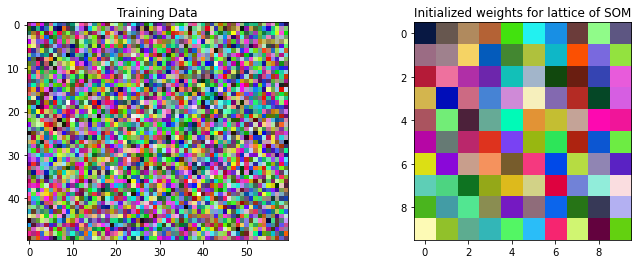

In [19]:
samples = 3000 ;
rand = np.random.RandomState(0) ;
trainX = rand.randint(0, 255, (samples, dimensions)) ;
figure, axes = plt.subplots( nrows=1, ncols=2, figsize=(12, 4)) ;
axes[0].imshow(trainX.reshape(50, 60, 3))
axes[0].title.set_text('Training Data') ;
axes[1].imshow(lattice.astype(int)) ;
axes[1].title.set_text('Initialized weights for lattice of SOM') ;

### Training Phase

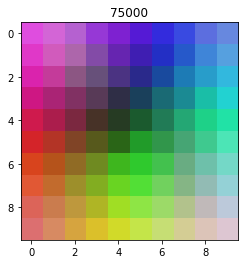

Epoch:  25
SOM Training Completed !


In [20]:
trainedLattice = SOMD.trainWeights(trainX, draw=True, random=True) ;

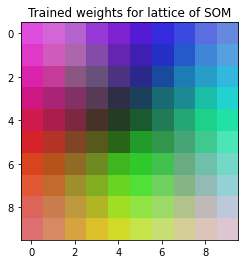

In [21]:
plt.imshow(trainedLattice.astype(int)) ;
plt.title('Trained weights for lattice of SOM') ;
plt.show() ;

### Predicting cluster of a color code

In [22]:
color = [[124, 254, 111]] ;
position = SOMD.bestMatchingNeuron(color, 0) ;
position

[7, 6]

### Conclusion

The color code 124, 254, 111 is for almost green color and we can see that position (7,6) in the image plot is greenish as well which was evaluated from the trained SOM lattice. The lattice itself represents the clustering or grouping of similar shades of color and it can also predict i.e. classify which shade of color it belongs to. Hence, SOM works very well for clustering.

## 3. Color segmentation by SOM Clustering

In [23]:
image = Image.open('meow.png') ;
cat = image.convert('RGB') ;
cat = np.asarray(cat) ; 
cat

array([[[ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142]],

       [[ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [  0,   0,   0],
        [ 84, 109, 142]],

       [[ 84, 109, 142],
        [  0,   0,   0],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [ 84, 109, 142],
        [  0,   0,   0],
        [ 84, 109, 142],
        [  0,   0,   0],
        [ 84, 109, 142],
        [ 84, 109, 142]],

       [[ 84, 109, 142],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [ 84, 109, 142],
        [  0,   0,   0],
        [ 84, 109, 142],
        [ 84, 109, 

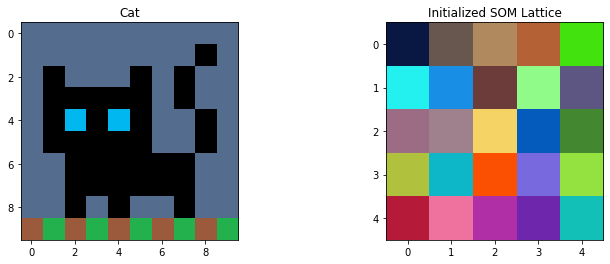

In [24]:
SOMD = SOMWithDecayingRange(rows=5, columns=5, maxLearningRate=0.25, maxIterations=20000, maxDistance=2) ;
lattice = SOMD.createRandomLattice(low=0, high=255, dimensions=3, randomSeed=100) ;
figure, axes = plt.subplots( nrows=1, ncols=2, figsize=(12, 4)) ;
axes[0].imshow(cat) ;
axes[0].title.set_text('Cat') ;
axes[1].imshow(lattice.astype(int)) ;
axes[1].title.set_text('Initialized SOM Lattice') ;

In [25]:
catTargets = np.empty(100, dtype='object') ;
data = cat.reshape(cat.shape[0]*cat.shape[1],3) ;
for i in range(len(catTargets)):
    if all(data[i] == 0):
        catTargets[i] = 4 ;
    else:
        catTargets[i] = 0 ;
        
catTargets

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 0, 4,
       0, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

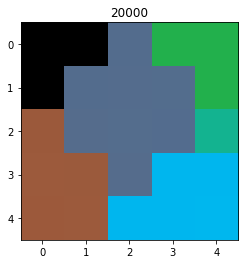

Epoch:  200
SOM Training Completed !


In [26]:
trainedLattice = SOMD.trainWeights(data, draw=True, random=True) ;

In [27]:
labels = np.empty((5,5), dtype=object) ;
for i in range(len(data)):
    bmu = SOMD.bestMatchingNeuron(data, i) ;
    labels[bmu[0]][bmu[1]] = catTargets[i] ;

labels

array([[4, None, None, None, 0],
       [None, None, 0, None, None],
       [None, None, None, None, None],
       [0, None, None, None, None],
       [None, None, None, None, 0]], dtype=object)

In [28]:
predictedLabels = np.empty(100, dtype='object') ;
for i in range(len(data)):
    bmu = SOMD.bestMatchingNeuron(data, i) ;
    predictedLabels[i] = labels[bmu[0]][bmu[1]] ;
      
predictedLabels 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4,
       0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 4, 0, 0, 0, 4, 0, 4,
       0, 4, 0, 0, 4, 0, 0, 4, 4, 4, 4, 4, 0, 0, 4, 0, 0, 0, 4, 4, 4, 4,
       4, 4, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=object)

In [29]:
segmented_cat = np.empty((100,3), dtype='object') ;
for i in range(len(predictedLabels)):
    if predictedLabels[i] == 4:
        segmented_cat[i] = np.copy([0,0,0]) ;
    else:
        segmented_cat[i] = np.copy([255,255,255]) ;
segmented_cat = segmented_cat.reshape(10, 10, 3) ;

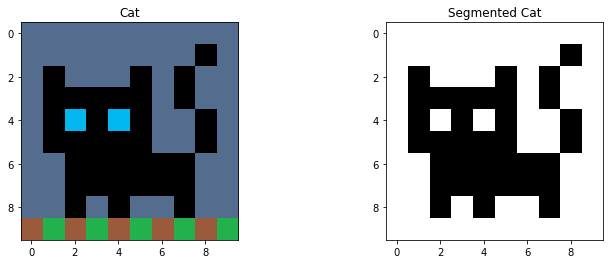

In [30]:
figure, axes = plt.subplots( nrows=1, ncols=2, figsize=(12, 4)) ;
axes[0].imshow(cat) ;
axes[0].title.set_text('Cat') ;
axes[1].imshow(segmented_cat.astype(int)) ;
axes[1].title.set_text('Segmented Cat') ;
plt.show() ;

In [31]:
from sklearn.metrics import accuracy_score ;
accuracy = accuracy_score(catTargets.tolist(), predictedLabels.tolist()) ;
print('Accuracy: ', np.round(accuracy*100,2), "%") ;

Accuracy:  100.0 %


### Conclusion

In this way, we used SOM training to segment black colored cat from the image !